# Check outputs

inputFiles/SnowMIP/sap/job_options_file_spinup-final_Ref.txt

- 2006 to 2014
- metLoop = 20
- spinfast = 1

Annual outputs only

In [1]:
site = 'sap'
site_longname = 'Sapporo, Japan'
y_start = 2006
y_end = 2014
metLoop = 20
spinfast = 1

print('Spinup years: ' + str((y_end-y_start+1)*metLoop) + '\nWith spinfast equivals to: ' + str((y_end-y_start+1)*metLoop*spinfast)) 

Spinup years: 180
With spinfast equivals to: 180


In [2]:
# Env: sc2_v0
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import calendar
import os

In [3]:
exp = 'Ref'
path = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/'+site+'/spinup-final_'+exp

In [4]:
!ls {path}

actlyr_annually.nc	    ftablemax_annually.nc      npp_annually.nc
actlyrmax_annually.nc	    ftablemin_annually.nc      output.txt
actlyrmin_annually.nc	    fVegLitter_annually.nc     pr_annually.nc
albs_annually.nc	    gpp_annually.nc	       ra_annually.nc
cLand_annually.nc	    hfls_annually.nc	       rh_annually.nc
cLeaf_annually.nc	    hfss_annually.nc	       rls_annually.nc
cRoot_annually.nc	    lai_annually.nc	       rmrveg_annually.nc
cSoil_annually.nc	    landCoverFrac_annually.nc  rss_annually.nc
cStem_annually.nc	    mrro_annually.nc	       sftlf.nc
cVeg_annually.nc	    mrsfl_annually.nc	       tas_annually.nc
evspsbl_annually.nc	    mrsll_annually.nc	       tran_annually.nc
fProductDecomp_annually.nc  nbp_annually.nc	       vcmax0_annually.nc
ftable_annually.nc	    nep_annually.nc	       vegHeight_annually.nc


As we generally start the C pools, etc. from zero it takes several runs to spin up sites. Especially the high-latitude sites tend to be slower to spin up. To check whether the model is spun up, we usually look at the outputs for NBP, soil C, etc. to see whether they’re relatively stable or close to zero for NBP averaged over several years. An easy check is to look at the ratio of NEP/NPP. We usually say that a site is spun up, if the absolute value of NEP/NPP is less than 0.02.

In [5]:
freq = 'annually'

tas = xr.open_dataset(path+'/tas_'+freq+'.nc').tas
# snd = xr.open_dataset(path+'/snd_'+freq+'.nc').snd
# snw = xr.open_dataset(path+'/snw_'+freq+'.nc').snw
nbp = xr.open_dataset(path+'/nbp_'+freq+'.nc').nbp # net mass flux of carbon from atmosphere into land
nep = xr.open_dataset(path+'/nep_'+freq+'.nc').nep # Natural flux of CO2 atm -> land
npp = xr.open_dataset(path+'/npp_'+freq+'.nc').npp # Carbon Mass Flux out of Atmosphere due to Net Primary Production
cSoil = xr.open_dataset(path+'/cSoil_'+freq+'.nc').cSoil # Carbon mass in the full depth of the soil model
vegHeight = xr.open_dataset(path+'/vegHeight_'+freq+'.nc').vegHeight

tas

<xarray.DataArray 'tas' (time: 180, lat: 1, lon: 1)>
[180 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2006-12-31 2007-12-31 ... 2185-12-27
Dimensions without coordinates: lat, lon
Attributes:
    long_name:   Near-surface air temperature at reference height
    units:       K
    nameInCode:  taacc_yr

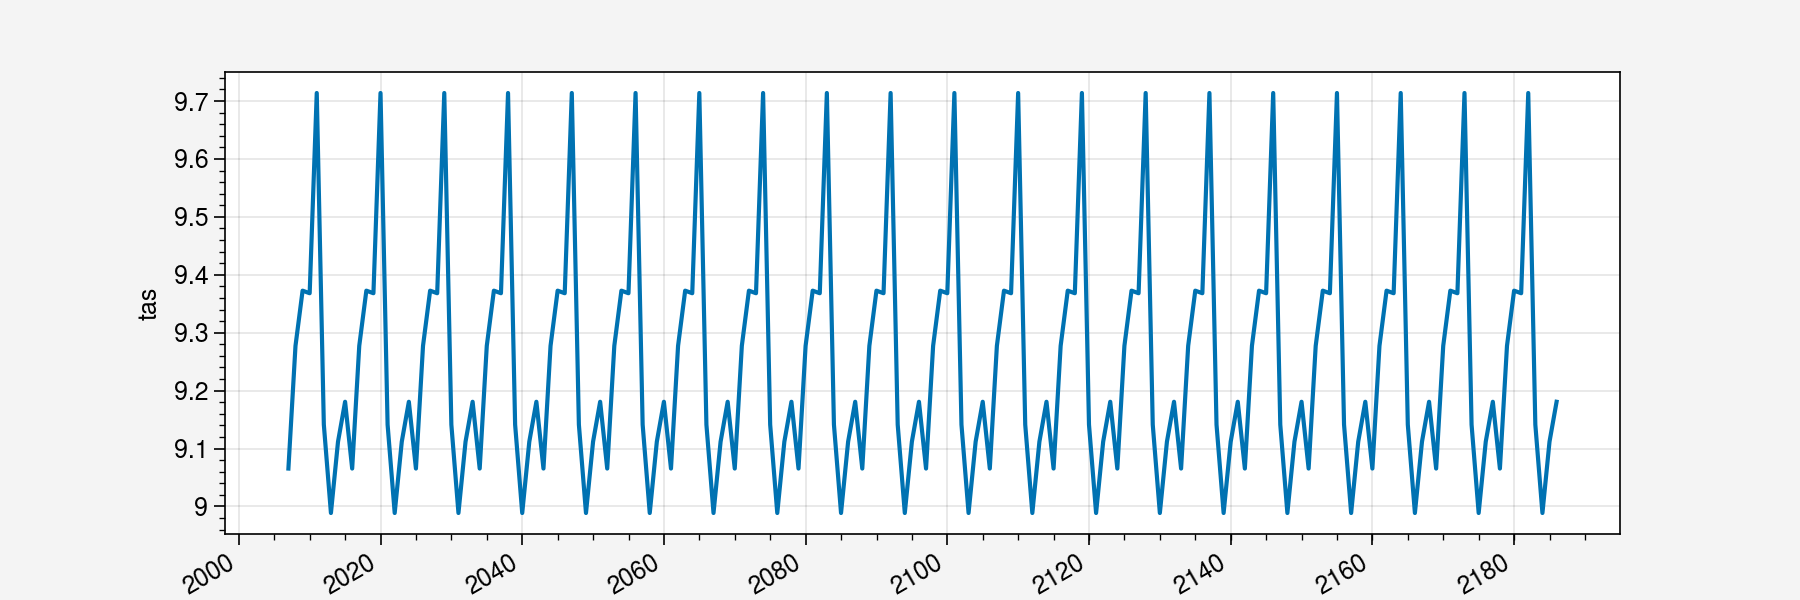

In [6]:
(tas-273.15).plot(aspect=3, size=3)

In [7]:
# snd.plot()

In [8]:
# snw.plot()

## Check the carbon fluxes

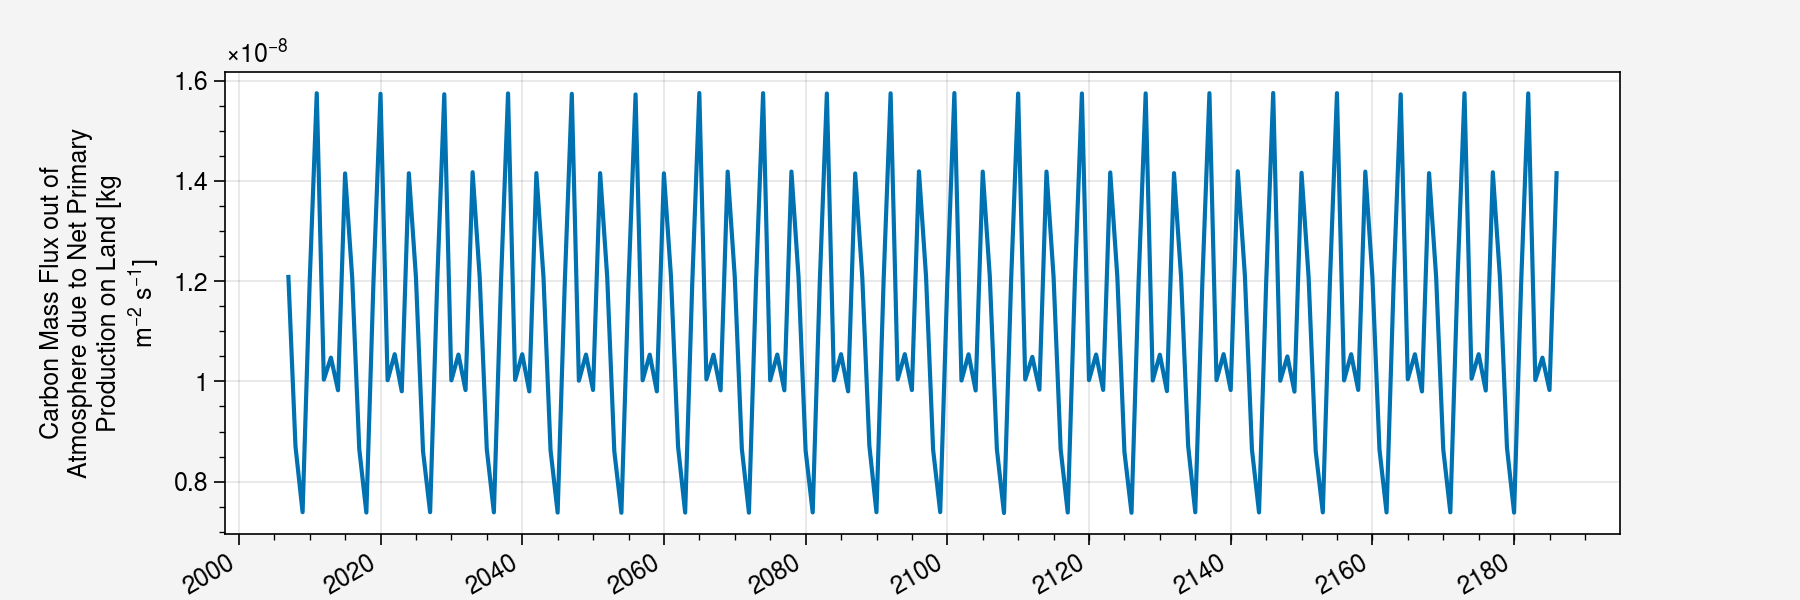

In [9]:
npp.plot(aspect=3, size=3)

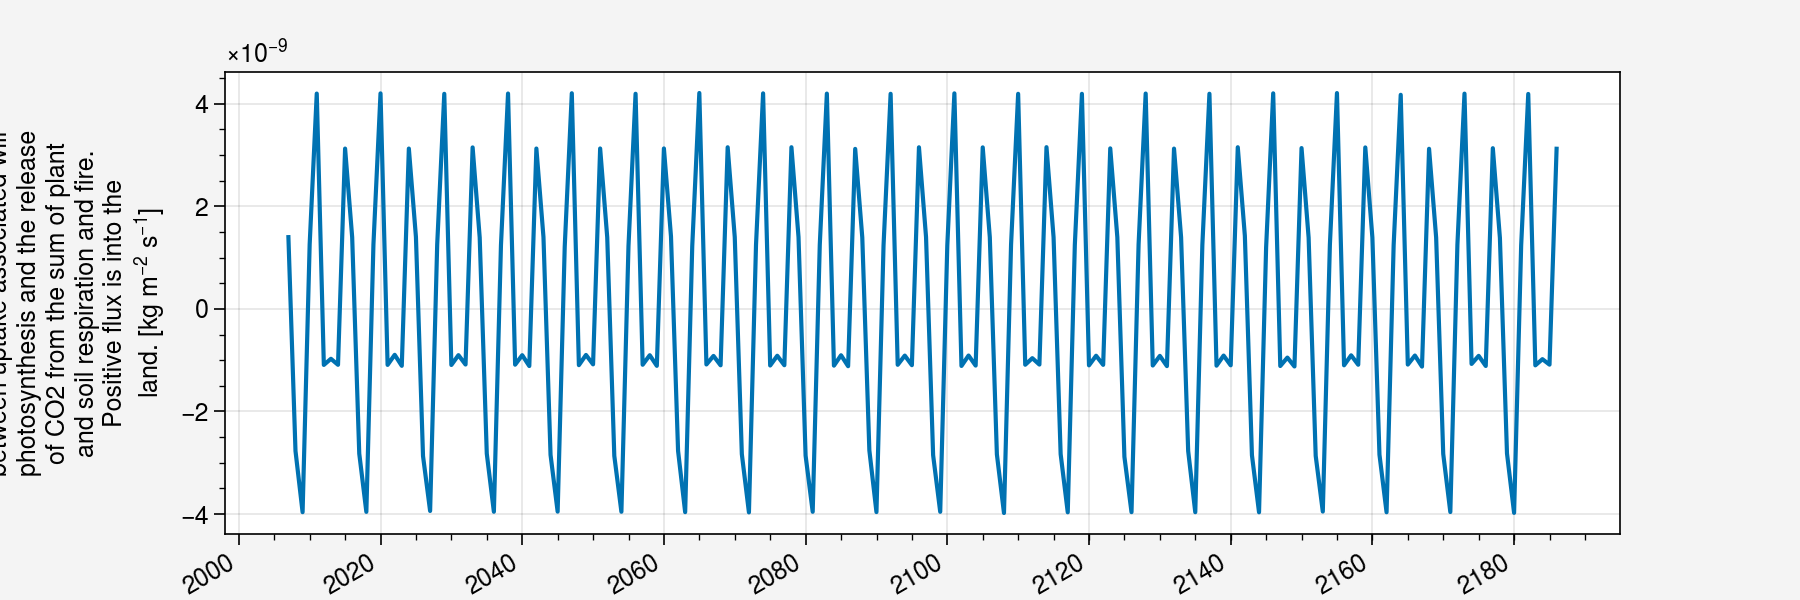

In [10]:
nep.plot(aspect=3, size=3)

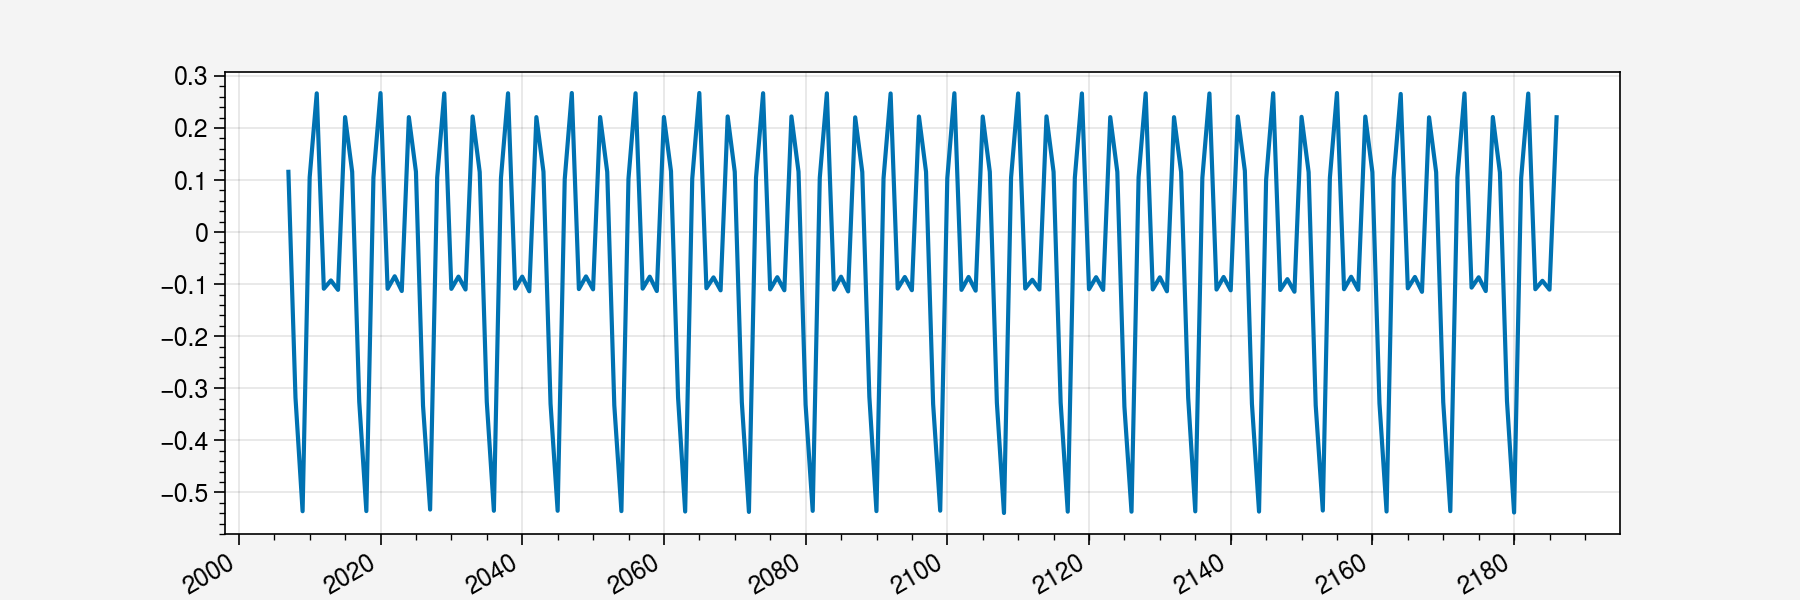

In [11]:
(nep/npp).plot(aspect=3, size=3)

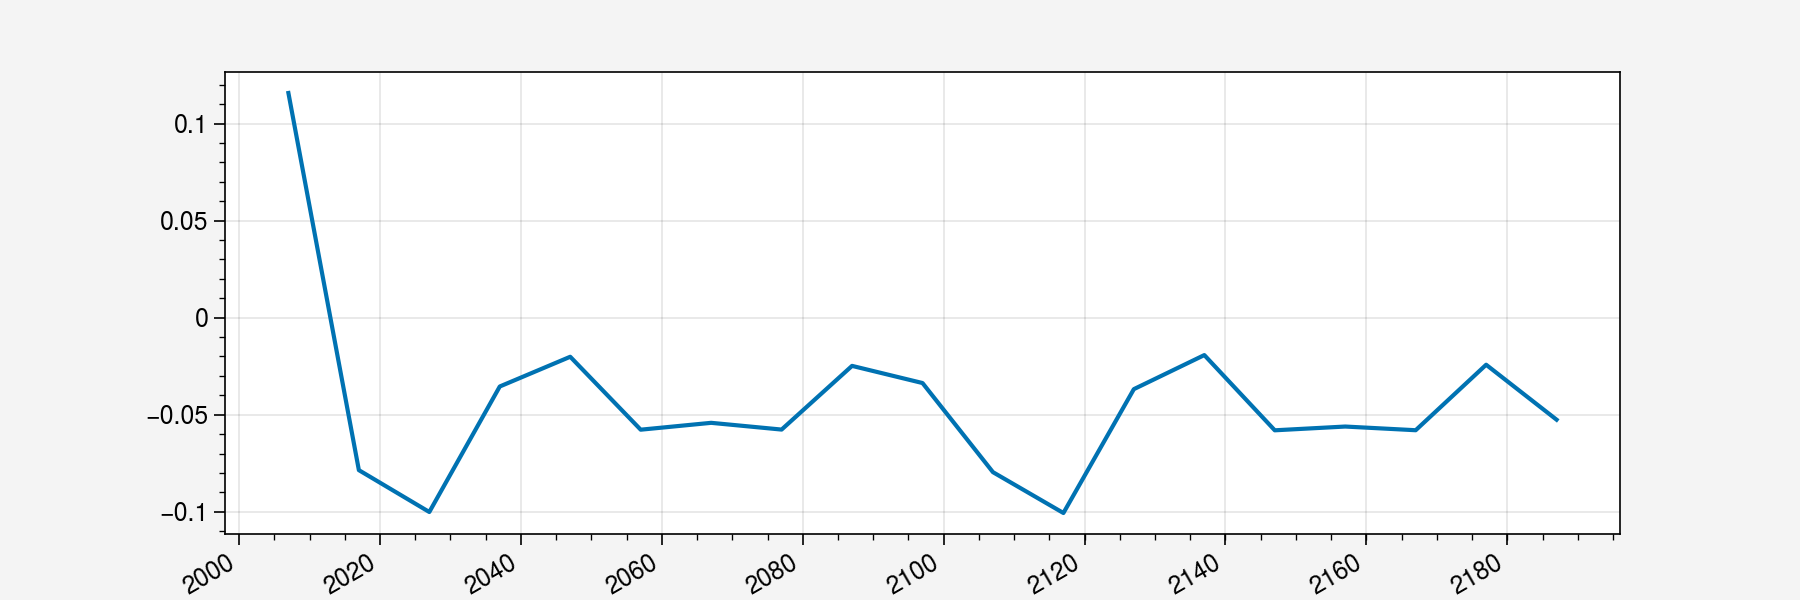

In [12]:
(nep/npp).resample(time='10Y').mean().plot(aspect=3, size=3)

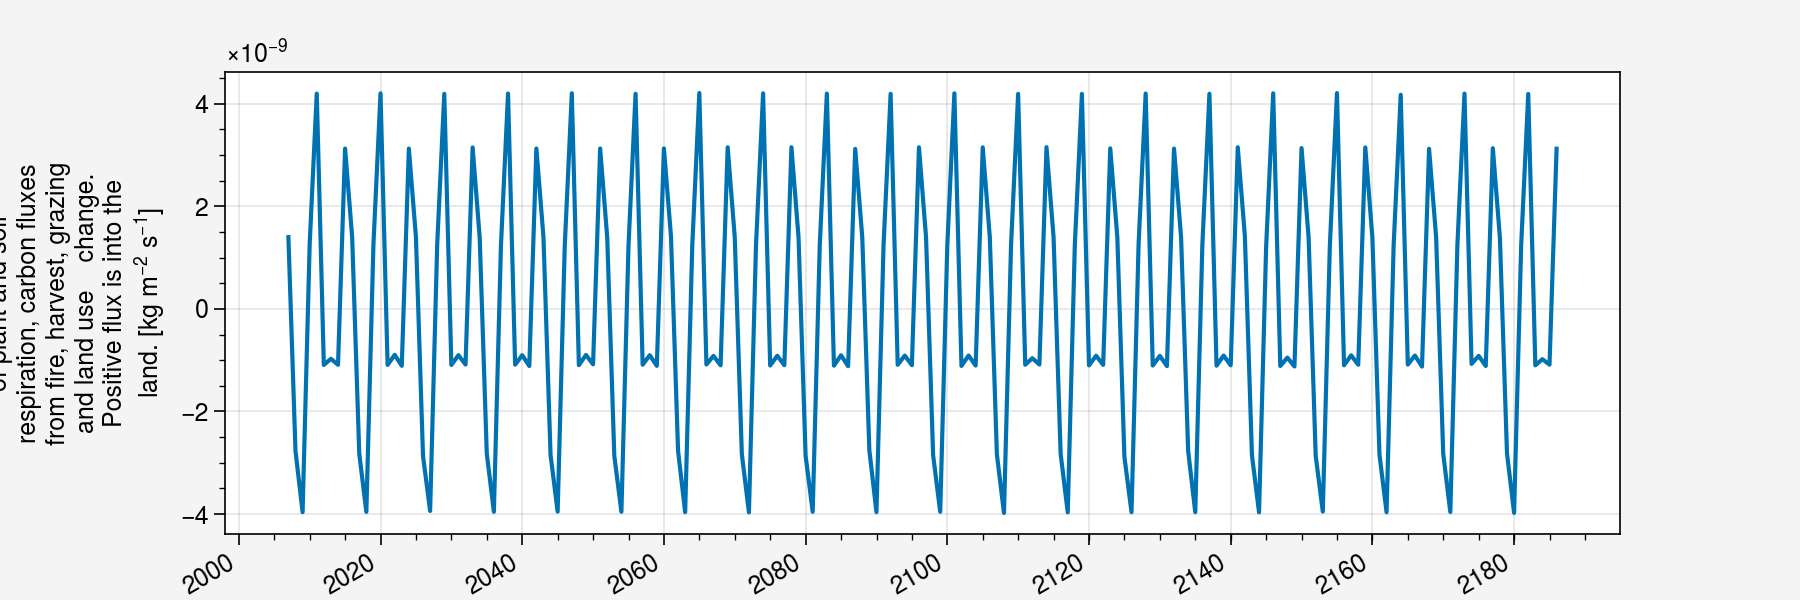

In [13]:
nbp.plot(aspect=3, size=3)

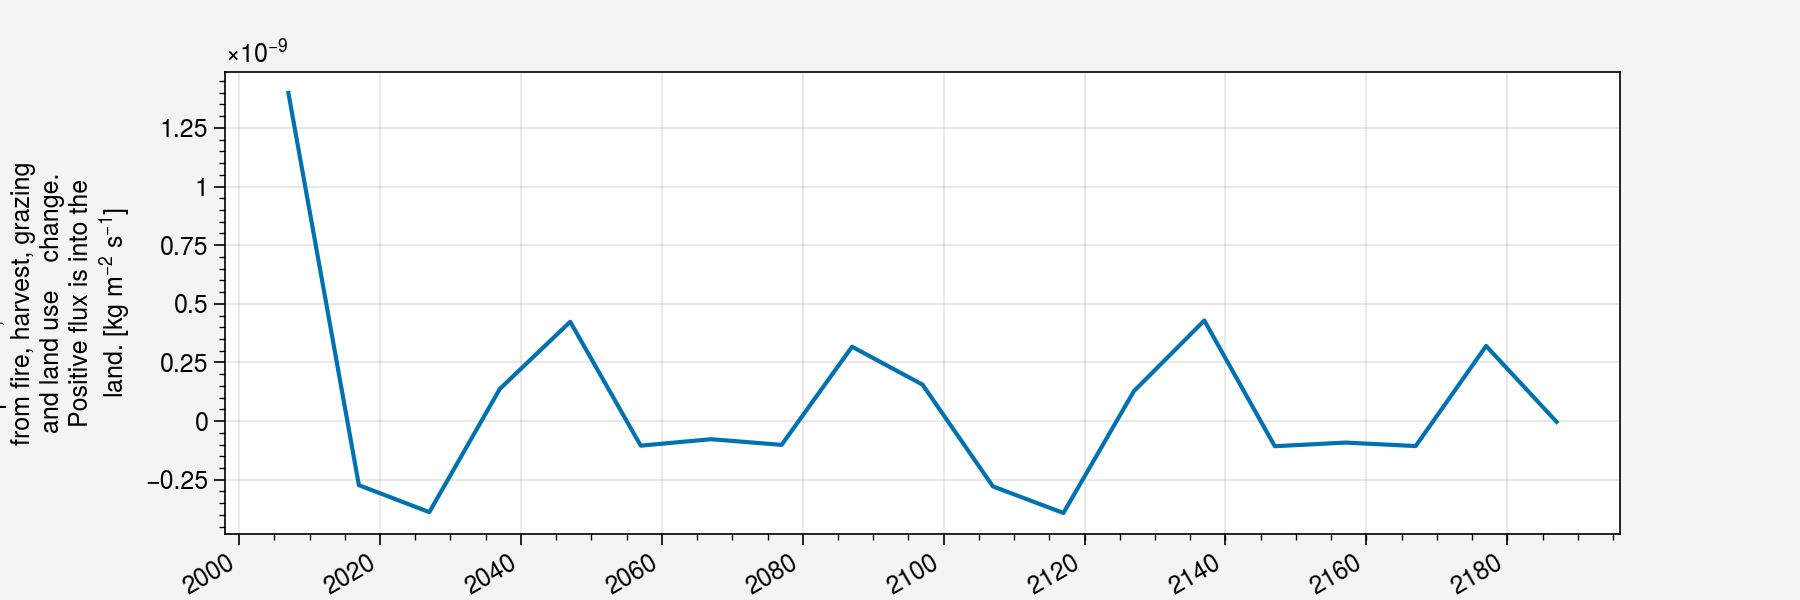

In [14]:
nbp.resample(time='10Y').mean().plot(aspect=3, size=3)

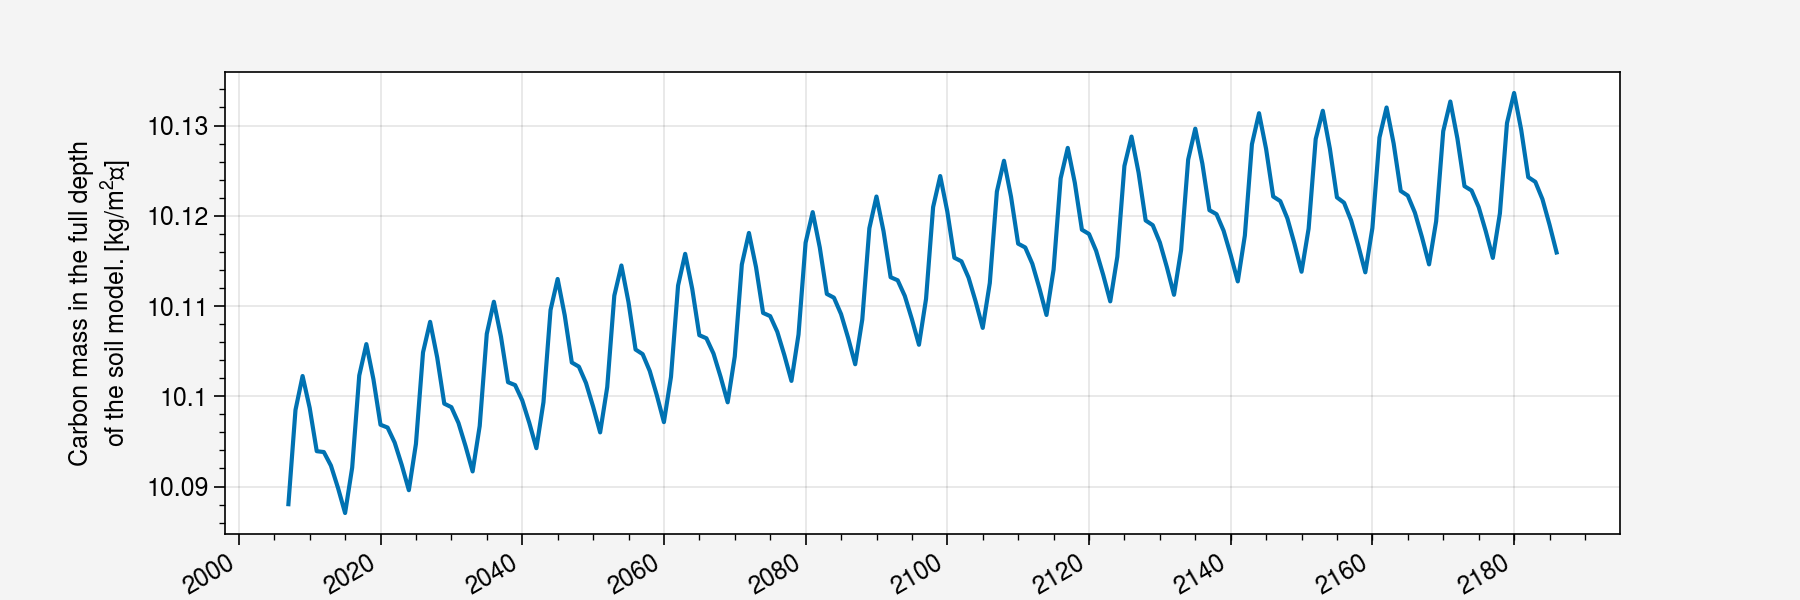

In [15]:
cSoil.plot(aspect=3, size=3)

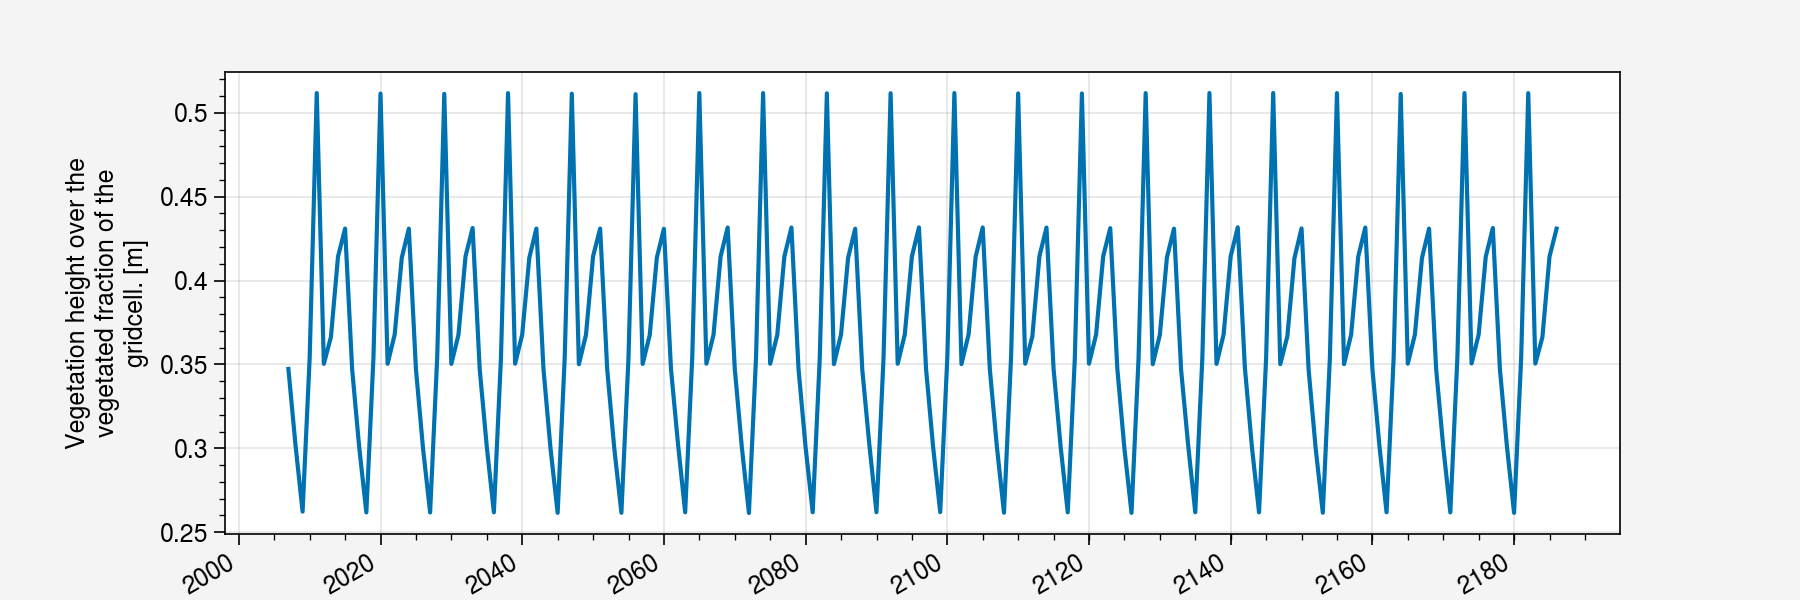

In [16]:
vegHeight.plot(aspect=3, size=3)

In [17]:
cSoil.long_name

'Carbon mass in the full depth of the soil model.'

Text(0.5, 0.98, 'Spinup Sapporo, Japan (2006-2014) / metLoop = 20; spinfast = 1')

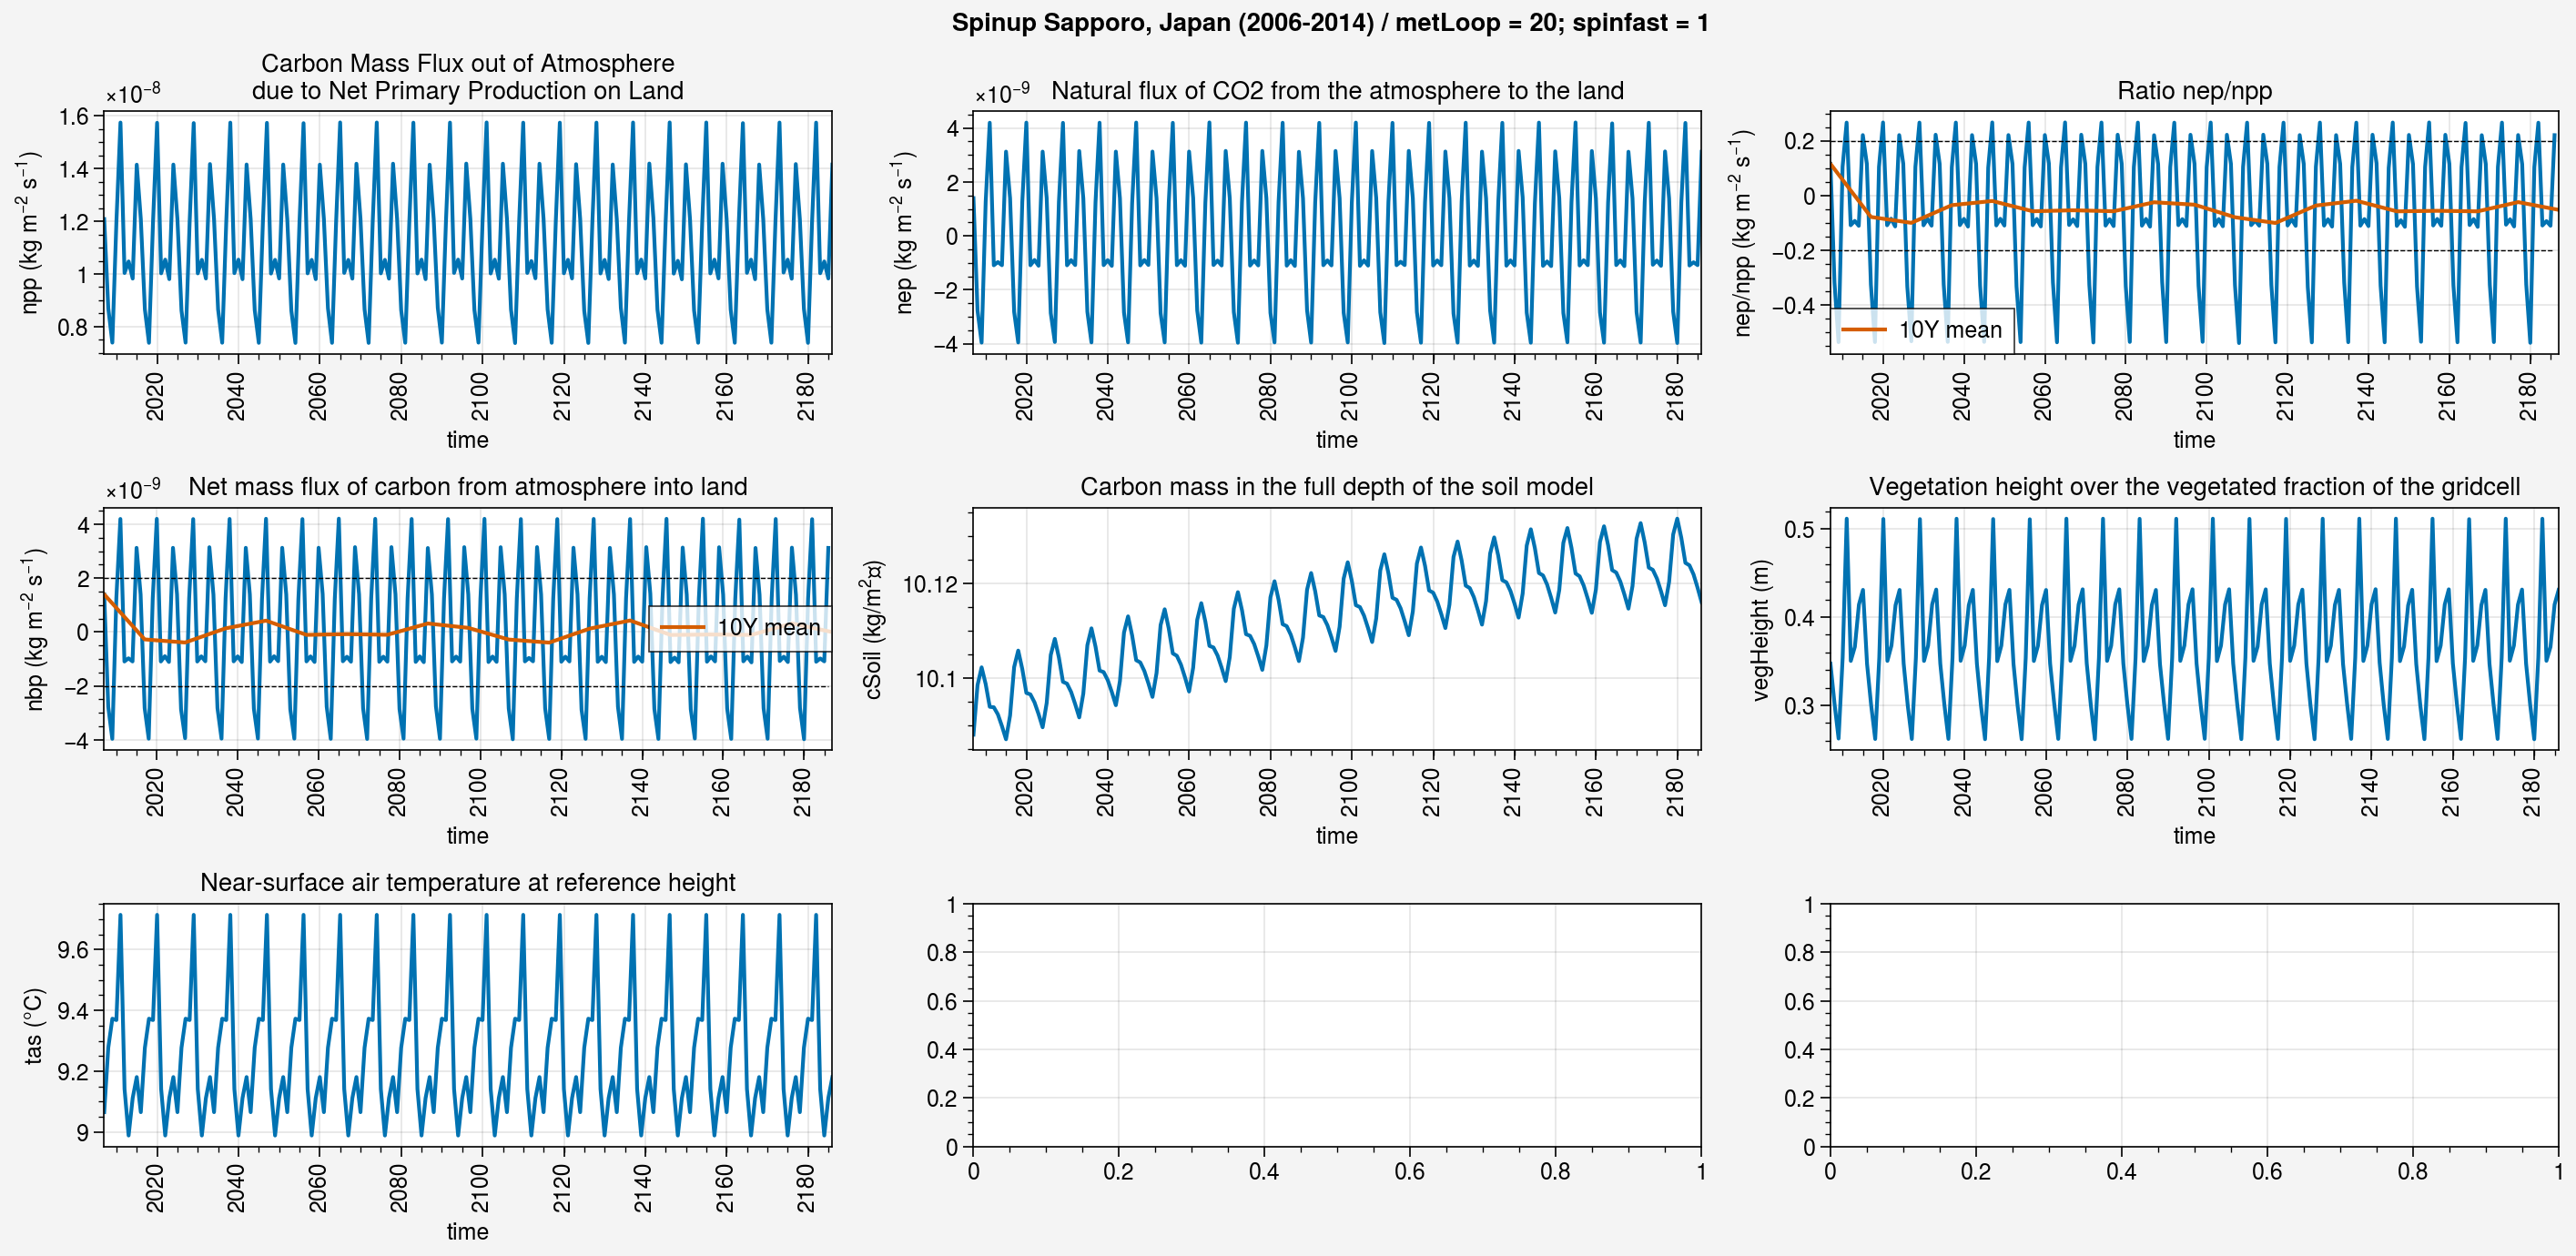

In [18]:
fig, axs = pplt.subplots(ncols=3, nrows=3, refaspect=3, refwidth=4, share=0)

# npp
axs[0].plot(npp)
axs[0].format(title='Carbon Mass Flux out of Atmosphere\ndue to Net Primary Production on Land', ylabel='npp ('+npp.units+')')

# nep
axs[1].plot(nep)
axs[1].format(title='Natural flux of CO2 from the atmosphere to the land', ylabel='nep ('+nep.units+')')

# nep/npp
axs[2].plot(nep/npp)
k = axs[2].plot((nep/npp).resample(time='10Y').mean(), label='10Y mean')
axs[2].plot(nep*0+0.2, color='k', lw=0.5, ls='--')
axs[2].plot(nep*0-0.2, color='k', lw=0.5, ls='--')
axs[2].format(title='Ratio nep/npp', ylabel='nep/npp ('+nep.units+')')
axs[2].legend(k)

# nbp
axs[3].plot(nbp)
axs[3].format(title='Net mass flux of carbon from atmosphere into land', ylabel='nbp ('+nbp.units+')')
k = axs[3].plot(nbp.resample(time='10Y').mean(), label='10Y mean')
axs[3].plot(nbp*0+0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].plot(nbp*0-0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].legend(k)

# cSoil
axs[4].plot(cSoil)
axs[4].format(title='Carbon mass in the full depth of the soil model', ylabel='cSoil ('+cSoil.units+')')

# vegHeight
axs[5].plot(vegHeight)
axs[5].format(title='Vegetation height over the vegetated fraction of the gridcell', ylabel='vegHeight ('+vegHeight.units+')')

# tas
axs[6].plot(tas-273.15)
axs[6].format(title=tas.long_name, ylabel='tas (°C)')

fig.suptitle('Spinup '+site_longname+' ('+str(y_start)+'-'+str(y_end)+') / metLoop = '+str(metLoop)+'; spinfast = '+str(spinfast))

## Check restart file

In [19]:
path = "/home/lalandmi/eccc/classic-develop/inputFiles/SnowMIP/"+site

In [20]:
rsfile = xr.open_dataset(path+'/rsfile_spinup-final_'+exp+'.nc')
rsfile

<xarray.Dataset>
Dimensions:            (tile: 1, lat: 1, lon: 1, icp1: 6, layer: 20, ic: 5,
                        icc: 12, iccp1: 13, iccp2: 14, slope: 8)
Coordinates:
  * ic                 (ic) int32 1 2 3 4 5
  * icc                (icc) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * iccp1              (iccp1) int32 1 2 3 4 5 6 7 8 9 10 11 12 13
  * iccp2              (iccp2) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * icp1               (icp1) int32 1 2 3 4 5 6
  * lat                (lat) float64 43.08
  * layer              (layer) float64 0.05 0.15 0.25 0.35 ... 18.9 41.4 58.9
  * lon                (lon) float64 141.3
  * slope              (slope) int32 1 2 3 4 5 6 7 8
  * tile               (tile) int32 1
Data variables: (12/101)
    ALBS               (tile, lat, lon) float64 ...
    ALIC               (tile, icp1, lat, lon) float64 ...
    ALVC               (tile, icp1, lat, lon) float64 ...
    CLAY               (tile, layer, lat, lon) float64 ...
    CMAS               (tile, ic, lat, lon) float64 ...
    Cmossmas           (tile, lat, lon) float64 ...
    ...                 ...
    stemmass_s         (tile, icc, lat, lon) float64 ...
    stmhrlos           (tile, icc, lat, lon) float64 ...
    tcoldm             (lat, lon) float32 ...
    twarmm             (lat, lon) float32 ...
    tymaxlai           (tile, icc, lat, lon) float64 ...
    nh4_mass           (tile, iccp1, lat, lon) float32 ...
Attributes:
    title:          CLASSIC initialization file created from: /home/acrp001/m...
    creation_date:  20190523
    history:        Wed Jun 12 17:19:01 2019: ncks -4 ./rsfile.nc ./rsfile.nc
    NCO:            4.4.2
    row_bounds:     1 1

In [21]:
cSoil[-1]

<xarray.DataArray 'cSoil' (lat: 1, lon: 1)>
array([[10.115937]])
Coordinates:
    time     datetime64[ns] 2185-12-27
Dimensions without coordinates: lat, lon
Attributes:
    long_name:   Carbon mass in the full depth of the soil model.
    units:       kg/m$^2$​
    nameInCode:  soilcmas_yr_g

In [22]:
rsfile.fcancmx.squeeze().values

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [23]:
total = []
for i, fcancmx in enumerate(rsfile.fcancmx.squeeze().values):
    total.append(fcancmx*rsfile.soilcmas[0, :, i, 0, 0].sum())

np.sum(total)

10.115936914101004

In [24]:
!cp {path}/rsfile_spinup-final_{exp}.nc {path}/{site}_init_run_{exp}.nc
!cp {path}/rsfile_spinup-final_{exp}.nc {path}/rsfile_run_{exp}.nc
!mkdir /home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/{site}/run_{exp}

In [25]:
exp2 = 'EZERO'
!cp {path}/rsfile_spinup-final_{exp}.nc {path}/{site}_init_run_{exp2}.nc
!cp {path}/rsfile_spinup-final_{exp}.nc {path}/rsfile_run_{exp2}.nc
!mkdir /home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/{site}/run_{exp2}